# CALCULATE SIGNIFICANCE

Here, we calculate for each locality/grid point the probability of observing as many or more first/last occurrences  as we do (also proportion of emigration/immigration). We use the expectations calculated based on numbers of occurrence in the previous/following time unit within a focal area around the locality.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import beta
import matplotlib.pyplot as plt
import time

df = pd.read_csv('../csv/NOW_dataframe_cleaned.csv', index_col=0)
localityFeatures = pd.read_csv('../csv/localityFeatures500.csv', index_col=0)

timeUnits = ['old','MN1','MN2','MN3','MN4','MN5','MN6','MN7-8','MN9','MN10','MN11','MN12','MN13','MN14','MN15','MN16','MN17','MQ18','MQ19','recent']
pd.set_option('max_columns',100)

In [2]:
# import grid data

gridFeaturesAll = []
for timeUnit in timeUnits[1:19]:
    filename = '../csv/gridFeatures500/gridFeatures_' + timeUnit + '.csv'
    gridFeatures = pd.read_csv(filename, index_col=0)
    gridFeaturesAll.append(gridFeatures)

In [3]:
# CALCULATE SIGNIFICANCE for localities

for ix in localityFeatures.index:
    localityFeatures.loc[ix,'SIGNIFICANCE FIRST'] = \
                beta.cdf(localityFeatures.loc[ix,'EXPECTED PROPORTION OF FIRST OCCURRENCES'],\
                        localityFeatures.loc[ix,'FIRST OCCURRENCES IN FOCAL AREA (t)'],\
                        localityFeatures.loc[ix,'OCCURRENCES IN FOCAL AREA (t)']-\
                        localityFeatures.loc[ix,'FIRST OCCURRENCES IN FOCAL AREA (t)']+1 ) 
    localityFeatures.loc[ix,'SIGNIFICANCE LAST'] = \
                beta.cdf(localityFeatures.loc[ix,'EXPECTED PROPORTION OF LAST OCCURRENCES'],\
                        localityFeatures.loc[ix,'LAST OCCURRENCES IN FOCAL AREA (t)'],\
                        localityFeatures.loc[ix,'OCCURRENCES IN FOCAL AREA (t)']-\
                        localityFeatures.loc[ix,'LAST OCCURRENCES IN FOCAL AREA (t)']+1 ) 
    localityFeatures.loc[ix,'SIGNIFICANCE EMIGRATION'] = \
                beta.cdf(localityFeatures.loc[ix,'EXPECTED PROPORTION OF EMIGRATION'],\
                        localityFeatures.loc[ix,'NUMBER EMIGRANTS'],\
                        localityFeatures.loc[ix,'OCCURRENCES EMIGRATION (t)']-\
                        localityFeatures.loc[ix,'NUMBER EMIGRANTS']+1 )  
    localityFeatures.loc[ix,'SIGNIFICANCE IMMIGRATION'] = \
                beta.cdf(localityFeatures.loc[ix,'EXPECTED PROPORTION OF IMMIGRATION'],\
                        localityFeatures.loc[ix,'NUMBER IMMIGRANTS'],\
                        localityFeatures.loc[ix,'OCCURRENCES IMMIGRATION (t)']-\
                        localityFeatures.loc[ix,'NUMBER IMMIGRANTS']+1 )    

In [4]:
# CALCULATE SIGNIFICANCE for grid points

timeCount = 2
for gridFeatures in gridFeaturesAll[1::]:
    tic = time.clock()
    for ix in gridFeatures.index:
        gridFeatures.loc[ix,'SIGNIFICANCE FIRST'] = \
                    beta.cdf(gridFeatures.loc[ix,'EXPECTED PROPORTION OF FIRST OCCURRENCES'],\
                            gridFeatures.loc[ix,'FIRST OCCURRENCES IN FOCAL AREA (t)'],\
                            gridFeatures.loc[ix,'OCCURRENCES IN FOCAL AREA (t)']-\
                            gridFeatures.loc[ix,'FIRST OCCURRENCES IN FOCAL AREA (t)']+1 ) 
        gridFeatures.loc[ix,'SIGNIFICANCE LAST'] = \
                    beta.cdf(gridFeatures.loc[ix,'EXPECTED PROPORTION OF LAST OCCURRENCES'],\
                            gridFeatures.loc[ix,'LAST OCCURRENCES IN FOCAL AREA (t)'],\
                            gridFeatures.loc[ix,'OCCURRENCES IN FOCAL AREA (t)']-\
                            gridFeatures.loc[ix,'LAST OCCURRENCES IN FOCAL AREA (t)']+1 ) 
        gridFeatures.loc[ix,'SIGNIFICANCE EMIGRATION'] = \
                    beta.cdf(gridFeatures.loc[ix,'EXPECTED PROPORTION OF EMIGRATION'],\
                            gridFeatures.loc[ix,'EMIGRATION'],\
                            gridFeaturesAll[timeCount-2].loc[ix,'OCCURRENCES WITHOUT EXTINCTION']-\
                            gridFeatures.loc[ix,'EMIGRATION']+1 )  
        gridFeatures.loc[ix,'SIGNIFICANCE IMMIGRATION'] = \
                    beta.cdf(gridFeatures.loc[ix,'EXPECTED PROPORTION OF IMMIGRATION'],\
                            gridFeatures.loc[ix,'IMMIGRATION'],\
                            gridFeatures.loc[ix,'OCCURRENCES WITHOUT SPECIATION']-\
                            gridFeatures.loc[ix,'IMMIGRATION']+1 ) 
    
    toc = time.clock() 
    print(timeUnits[timeCount])
    timeCount += 1
    print('Time elapsed: ' + str((toc-tic)/60) + ' minutes.')         

MN2
Time elapsed: 1.2153127499999998 minutes.
MN3
Time elapsed: 0.8023054 minutes.
MN4
Time elapsed: 0.8343757833333333 minutes.
MN5
Time elapsed: 0.783901516666667 minutes.
MN6
Time elapsed: 0.7258813666666668 minutes.
MN7-8
Time elapsed: 0.7314113166666668 minutes.
MN9
Time elapsed: 0.7565169166666663 minutes.
MN10
Time elapsed: 0.7406408499999998 minutes.
MN11
Time elapsed: 0.7458674000000002 minutes.
MN12
Time elapsed: 0.7396380833333335 minutes.
MN13
Time elapsed: 0.8170487499999998 minutes.
MN14
Time elapsed: 0.7564272833333348 minutes.
MN15
Time elapsed: 0.744855099999999 minutes.
MN16
Time elapsed: 0.7500425500000005 minutes.
MN17
Time elapsed: 0.7394861166666676 minutes.
MQ18
Time elapsed: 0.7587823999999993 minutes.
MQ19
Time elapsed: 1.2326177833333343 minutes.


In [5]:
# save locality data
localityFeatures.to_csv('../csv/localityFeatures500.csv')

In [6]:
# save grid data
timeUnit_count = 1
for gridFeatures in gridFeaturesAll:
    focalTimeUnit = timeUnits[timeUnit_count]
    filename = '../csv/gridFeatures500/gridFeatures_' + focalTimeUnit + '.csv'
    gridFeatures.to_csv(filename)
    timeUnit_count += 1

## Beta distribution

The beta distribution can be used as a continuous approximation of the binomial distribution.

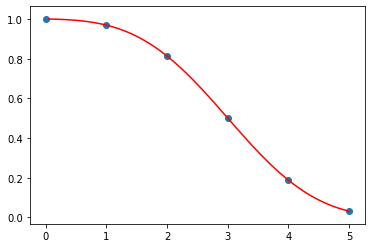

In [7]:
P = 0.5 # probability of success
T = 5 # trials
x = np.arange(0,T+1,1)
# binomial probability for x or more successes in T trials
plt.scatter(x,binom.sf(x-1,T,0.5))
x = np.linspace(0,T,100)
# beta probability for x or more successes in T trials (continuous)
plt.plot(x,beta.cdf(0.5,x,T-x+1),'red')
plt.show()

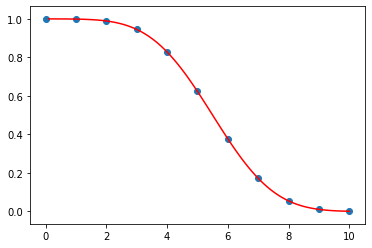

In [8]:
P = 0.5 # probability of success
T = 10 # trials
x = np.arange(0,T+1,1)
# binomial probability for x or more successes in T trials
plt.scatter(x,binom.sf(x-1,T,0.5))
x = np.linspace(0,T,100)
# beta probability for x or more successes in T trials (continuous)
plt.plot(x,beta.cdf(0.5,x,T-x+1),'red')
plt.show()

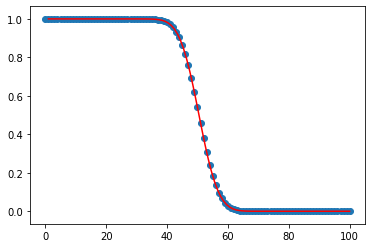

In [9]:
P = 0.5 # probability of success
T = 100 # trials
x = np.arange(0,T+1,1)
# binomial probability for x or more successes in T trials
plt.scatter(x,binom.sf(x-1,T,0.5))
x = np.linspace(0,T,100)
# beta probability for x or more successes in T trials (continuous)
plt.plot(x,beta.cdf(0.5,x,T-x+1),'red')
plt.show()

In [10]:
display(binom.sf(49,100,0.5))
display(beta.cdf(0.5,50,100-50+1))

0.5397946186935897

0.5397946186935897

In [11]:
display(binom.sf(22,100,0.5))
display(beta.cdf(0.5,50,100-23+1))

0.9999999920473358

0.9936696577397615

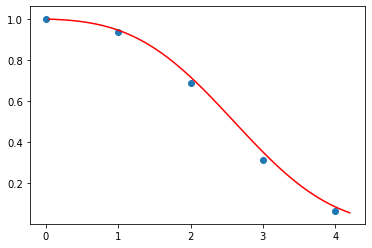

In [12]:
# binomial can only be used for x,T = integers
T = 4.2
x = np.arange(-1,np.round(T),1) # trial number rounded 
plt.scatter(x+1,binom.sf(x,np.round(T),0.5))
x = np.linspace(0,T,100)
plt.plot(x,beta.cdf(0.5,x,T-x+1),'red')
plt.show()